In [2]:
# import the libraries top use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_theme()

# Step 1: Problem statement and data collection

We can see the data information in the page <https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv> where each feature is:

1. age. Age of primary beneficiary **(numeric)**
2. sex. Gender of the primary beneficiary **(categorical)**
3. bmi. Body mass index **(numeric)**
4. children. Number of children/dependents covered by health insurance **(numeric)**
5. smoker. Is the person a smoker? **(categorical)**
6. region. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest **(categorical)**
7. charges. Health insurance premium **(numerical) (TARGET)**

In [3]:
from utils import load_data, ReadCsvParams, SaveCsvParams

file_path = 'demographic_health_data.csv'
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
read_csv_params: ReadCsvParams = {'delimiter': ','}
save_csv_params: SaveCsvParams = {'sep': ','}

df: pd.DataFrame = load_data(file_path=file_path, url=url, read_csv_params=read_csv_params, save_csv_params=save_csv_params)

File not found. Loading data from URL: https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv
Data saved to file: demographic_health_data.csv


## Problem to solve:
Calculate, based on the physiological data of its customers, what will be the premium (cost) to be borne by someone. Construct a Linear Regression model to predict the cost of a person to be ensured.

# Step 2: Exploration and data cleaning

## Dataframe information

Let's see the data

In [5]:
# head of the data
df.head(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
5,1011,10138,1198,11.816926,1130,11.146183,1395,13.760110,1446,14.263168,...,873,20.6,19.4,21.9,1651,4.5,4.2,4.8,360,6
6,1013,19680,2351,11.946138,2461,12.505081,2286,11.615854,2337,11.875000,...,1741,18.6,17.5,19.5,2841,4.3,4.1,4.6,662,6
7,1015,114277,13141,11.499252,14637,12.808352,15463,13.531157,13865,12.132800,...,9158,14.7,13.6,15.7,13182,3.6,3.3,3.8,3204,4
8,1017,33615,3869,11.509743,3812,11.340176,4380,13.029897,3734,11.108136,...,2870,17.5,16.6,18.5,4664,4.0,3.8,4.2,1068,5
9,1019,26032,2554,9.811002,2981,11.451291,2852,10.955747,2504,9.618931,...,2540,15.9,14.7,17.2,3353,3.9,3.6,4.2,814,6


In [5]:
# info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# describe the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Cols for the different types of data

In [7]:
# numerical columns
numerical_cols: list[str] = ['age', 'bmi', 'children', 'charges']

# categorical columns
categorical_cols: list[str] = ['sex', 'smoker', 'region']

# features
features = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']

# target variable
target: str = 'charges'

## Eliminate duplicates

We do not have a feature to verify if there are some duplicate values, so we are not going to test this.

## Eliminate irrelevant information

We are going to do this step after some of the analysis.

# Step 3: Analysis of uni variate variables

A **uni variate variable** is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.

## Analysis of categorical variables

A **categorical variable** is a type of variable that can be one of a limited number of categories or groups. These groups are often nominal (e.g., the color of a car: red, blue, black, etc., but none of these colors is inherently "greater" or "better" than the others) but can also be represented by finite numbers.

**To represent these types of variables we will use histograms.**

In [8]:
# let's remember the categorical data
print(f'Categorical columns: {categorical_cols}')
print(f'Amount of categorical columns: {len(categorical_cols)}')

Categorical columns: ['sex', 'smoker', 'region']
Amount of categorical columns: 3


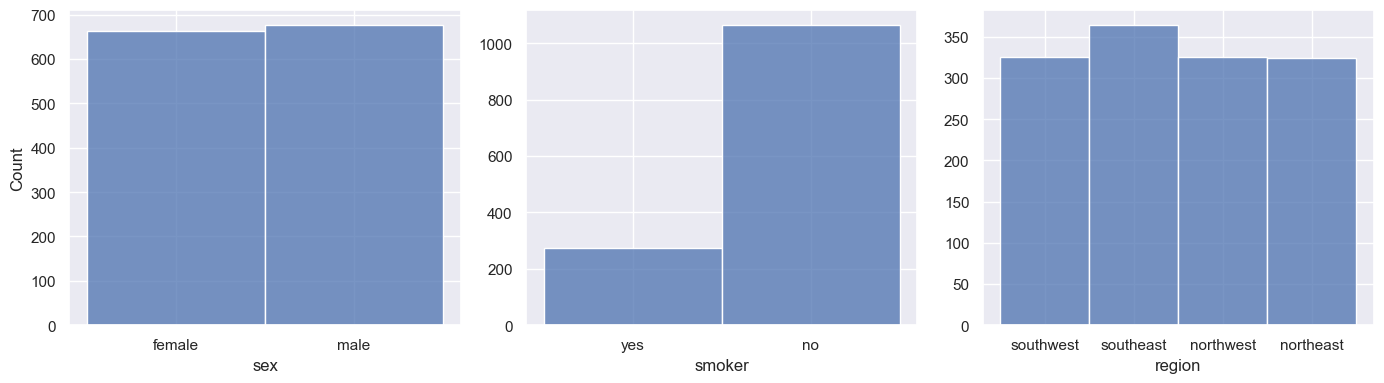

In [9]:
fig, axis = plt.subplots(1, 3, figsize = (14, 4))

# creating a multiple figure with histograms and box plots
# first row
# 	 col
sns.histplot(ax = axis[0], data = df, x = "sex")
# 	second col
sns.histplot(ax = axis[1], data = df, x = "smoker").set(ylabel = None)
# 	third col
sns.histplot(ax = axis[2], data = df, x = "region").set(ylabel = None)


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Analysis

The sex and region features are relatively evenly distributed, the categories of these features have approximately the same number of elements. The smoker feature is bias to the **no** label.

## Analysis on numeric variables

A **numeric variable** is a type of variable that can take numeric values (integers, fractions, decimals, negatives, etc.) in an infinite range. A numerical categorical variable can also be a numerical variable. 

**They are usually represented using a histogram and a boxplot, displayed together.**

In [10]:
# let's remember the categorical data
print(f'Categorical columns: {numerical_cols}')
print(f'Amount of categorical columns: {len(numerical_cols)}')

Categorical columns: ['age', 'bmi', 'children', 'charges']
Amount of categorical columns: 4


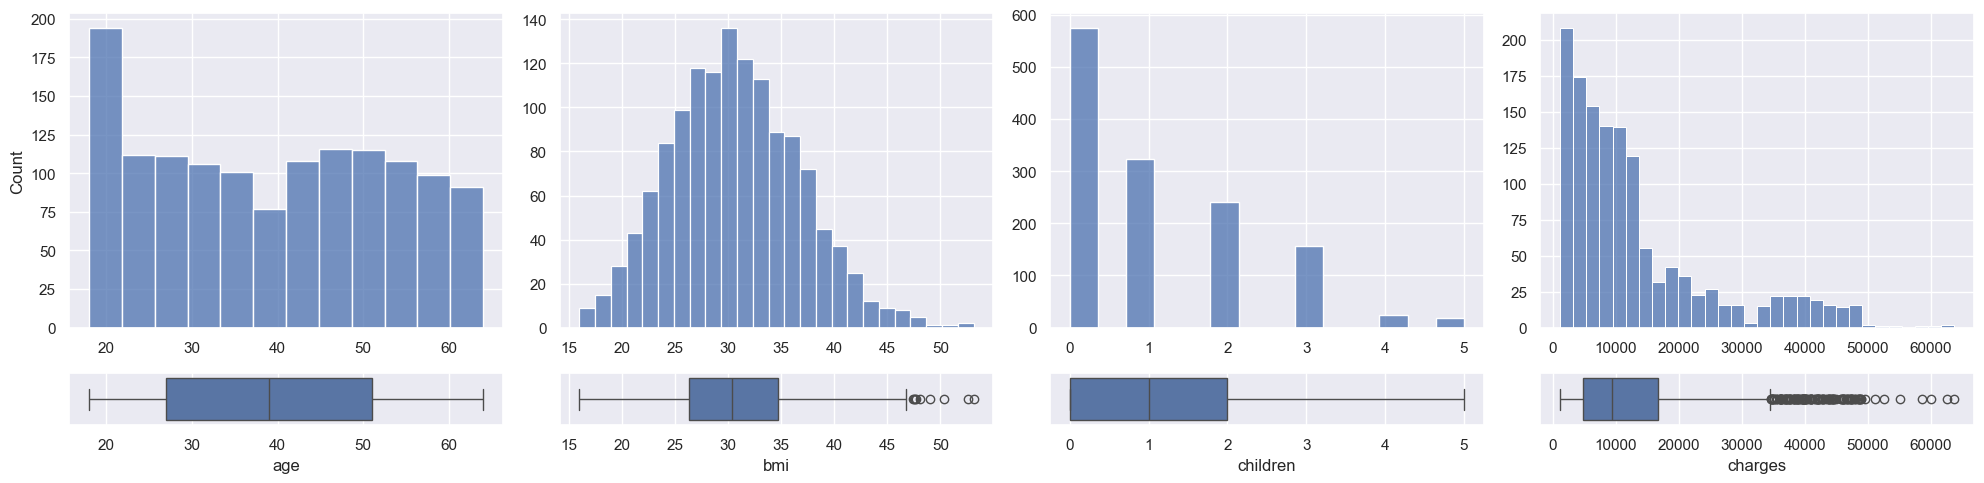

In [11]:
fig, axis = plt.subplots(2, 4, figsize = (20, 5), gridspec_kw={'height_ratios': [6, 1]})

# creating a multiple figure with histograms and box plots
# first row
# 	 col
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
# 	second col
sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")
# 	third col
sns.histplot(ax = axis[0, 2], data = df, x = "children").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "children")
# 	four col
sns.histplot(ax = axis[0, 3], data = df, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "charges")


# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

### Analysis

We can do a breakdown of the distribution and skewness for each variable:

**1. Age**

* **Histogram:** The distribution appears to be relatively uniform or slightly multimodal. There are no strong peaks or a clear bell shape.
* **Box Plot:** The box plot shows a relatively symmetrical distribution with no apparent outliers.
* **Distribution:** Not normally distributed. It looks more like a uniform distribution or possibly a multimodal distribution.
* **Skewness:** Slightly right-skewed, but not strongly so.

**2. BMI (Body Mass Index)**

* **Histogram:** The distribution looks somewhat bell-shaped but is not perfectly symmetrical. It has a slight tail towards higher BMI values.
* **Box Plot:** The box plot shows a slight right skew with a few outliers on the higher end ().
* **Distribution:** Approximates a normal distribution but with a slight positive skew (45 and up values).
* **Skewness:** Slightly right-skewed (positive skew).

**3. Children**

* **Histogram:** The variable is clearly discrete (whole numbers) and has a very skewed distribution. Most people have 0 children.
* **Box Plot:** The box plot shows a strong right skew.
* **Distribution:** Not normally distributed. It's a discrete distribution with a strong positive skew.
* **Skewness:** Strongly right-skewed (positive skew).

**4. Charges**

* **Histogram:** The distribution is heavily right-skewed. Most charges are low, with a long tail extending to higher values.
* **Box Plot:** The box plot confirms the strong right skew and shows many outliers at higher charge values (30.000 and up values)
* **Distribution:** Not normally distributed. It's a highly skewed distribution.
* **Skewness:** Strongly right-skewed (positive skew).

# Step 4: Analysis of multivariate variables

After analyzing the characteristics one by one, it is time to analyze them in relation to the predictor and to themselves, in order to draw clearer conclusions about their relationships and to be able to make decisions about their processing.

Thus, if we would like to eliminate a variable due to a high amount of null values or certain outliers, it is necessary to first apply this process to ensure that the elimination of certain values are not critical for the survival of a passenger. For example, the variable Cabin has many null values, and we would have to ensure that there is no relationship between it and survival before eliminating it, since it could be very significant and important for the model and its presence could bias the prediction.

## Numerical-numerical analysis

When the two variables being compared have numerical data, the analysis is said to be numerical-numerical. 

**Scatter-plots and correlation analysis are used to compare two numerical columns.**

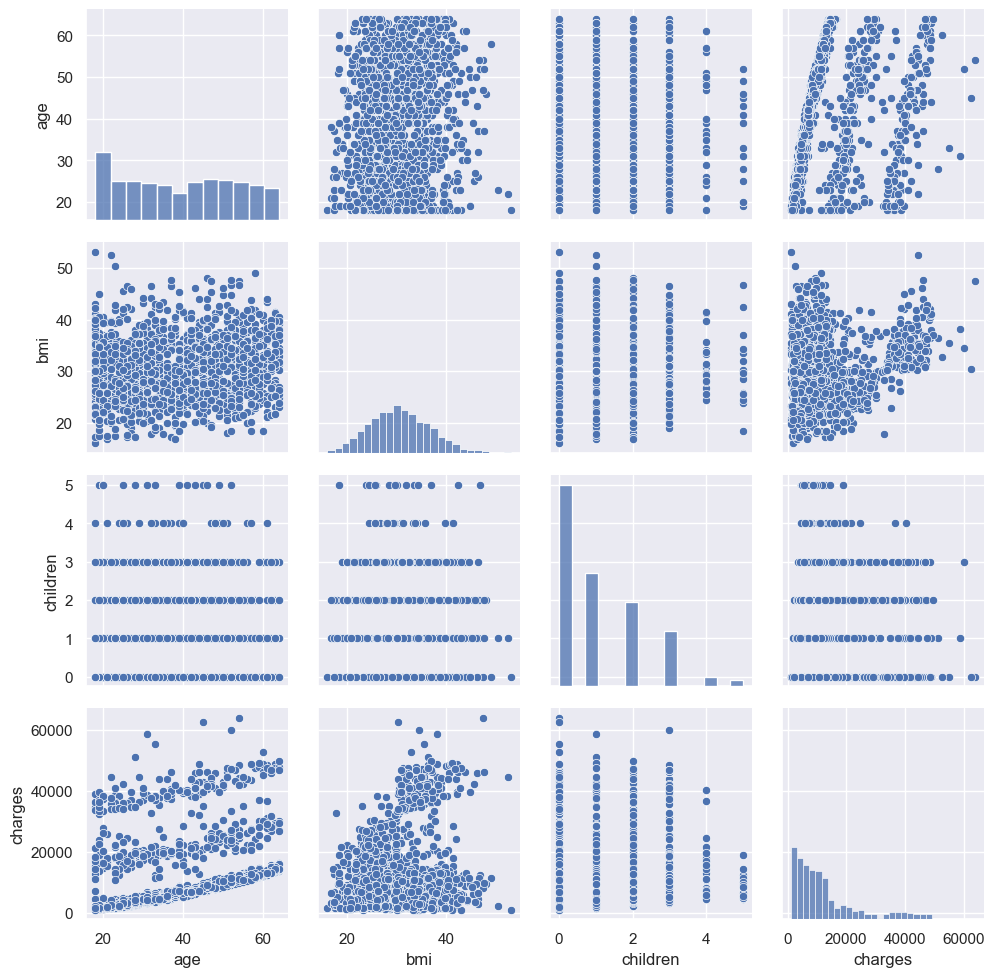

In [12]:
# graphs of numerical vs numerical with histograms and scatter plots
g = sns.PairGrid(df[numerical_cols])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

<Axes: >

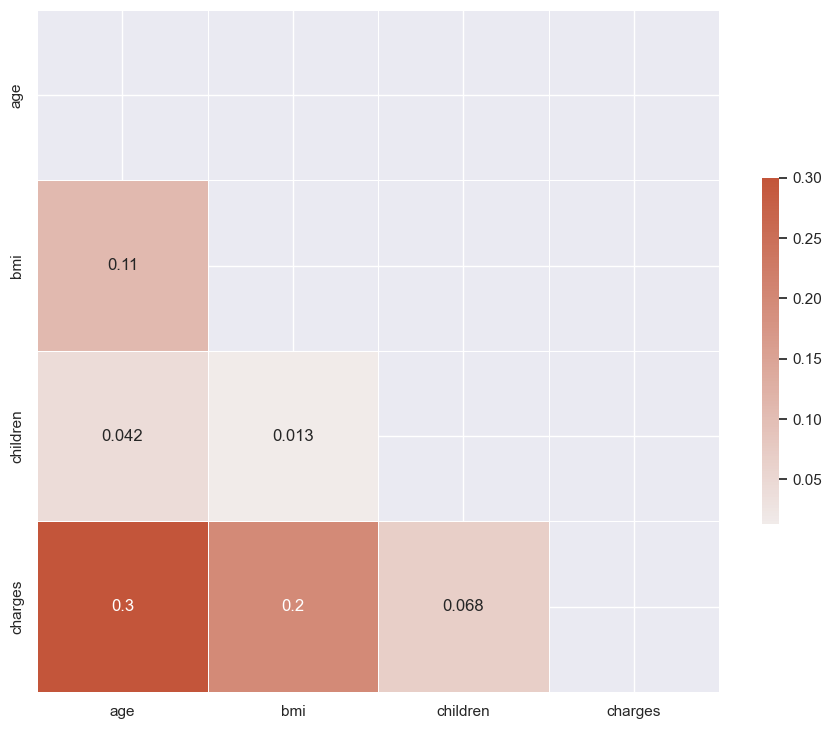

In [13]:
# compute the correlation matrix of the numerical columns
corr = df[numerical_cols].corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
	corr, 
	annot=True,
	mask=mask, 
	cmap=cmap, 
	vmax=.3, 
	center=0,
	square=True, 
	linewidths=.5,
	cbar_kws={"shrink": .5}
)

The variables with higher correlation are charges and age with a positive correlation of 0.3

## Categorical-categorical analysis

When the two variables being compared have categorical data, the analysis is said to be categorical-categorical. 

**Histograms and combinations are used to compare two categorical columns.**

### Factorize the dataframe

In [14]:
# get a copy of the dataframe with factorize categorical data
fact_df = df.copy()

# factorize every categorical column unless the target
for col in categorical_cols:
	fact_df[col] = pd.factorize(fact_df[col])[0]

In [15]:
# see the factorized dataframe
fact_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


<Axes: >

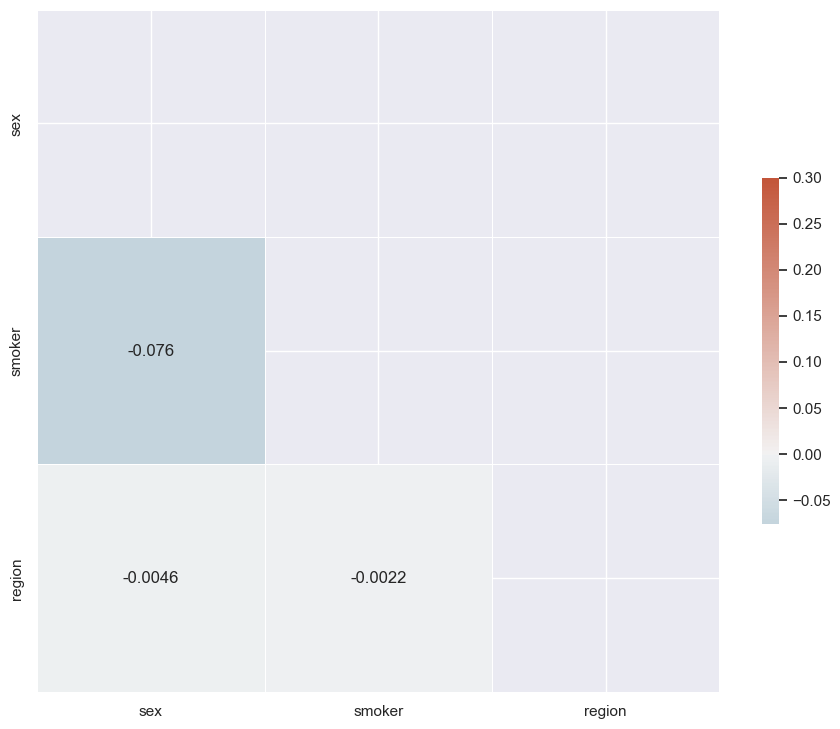

In [16]:
# compute the correlation matrix of the numerical columns
corr = fact_df[categorical_cols].corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
	corr, 
	annot=True,
	mask=mask, 
	cmap=cmap, 
	vmax=.3, 
	center=0,
	square=True, 
	linewidths=.5,
	cbar_kws={"shrink": .5}
)

All the correlations are small and negative, the relation between this variables could not be useful for the model

### Combinations of class with various predictors

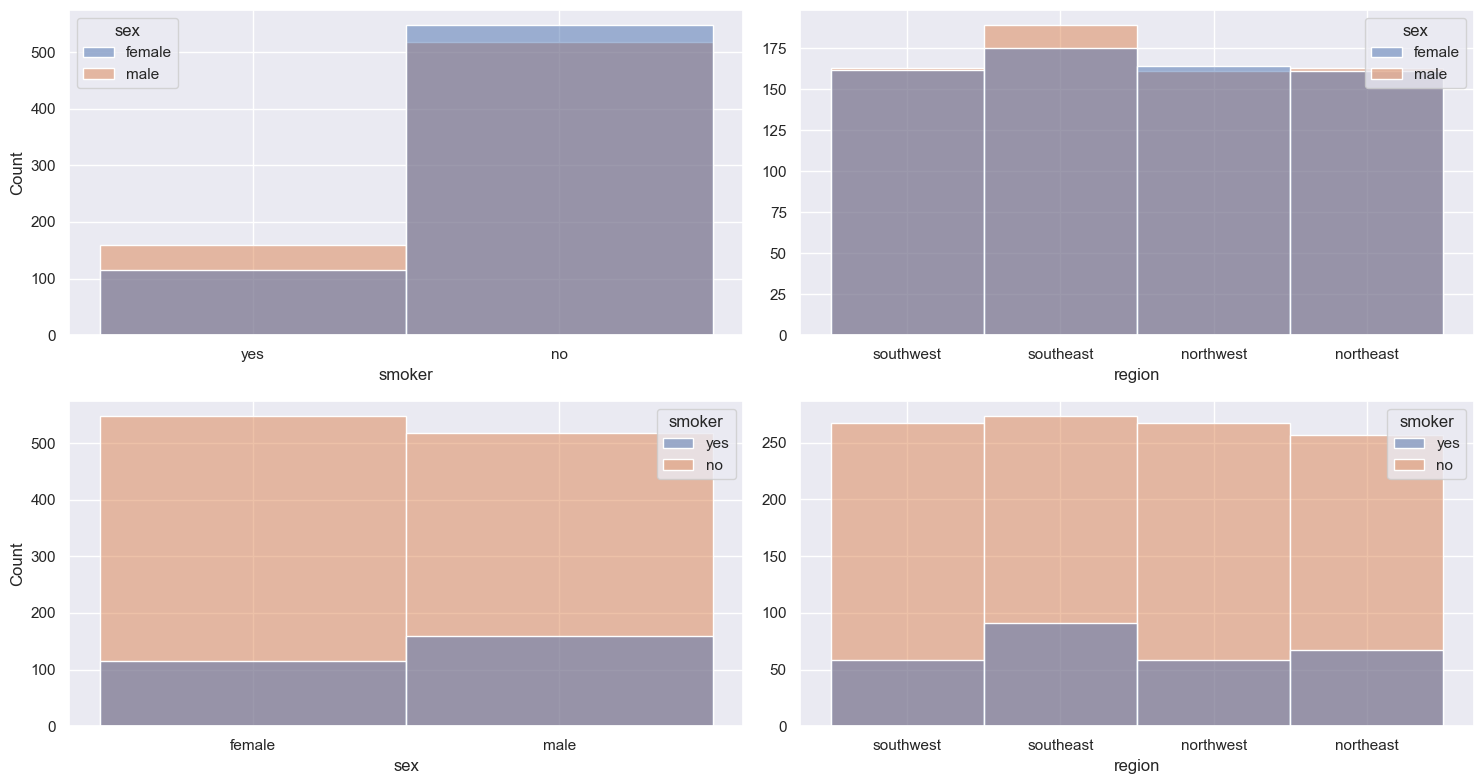

In [17]:
fig, axis = plt.subplots(2, 2, figsize = (15, 8))

# creating a multiple figure with histograms with hues

# first row
# 	 col
sns.histplot(ax = axis[0, 0], data = df, x = "smoker", hue="sex")
# 	second col
sns.histplot(ax = axis[0, 1], data = df, x = "region", hue="sex").set(ylabel = None)

# second row
# 	first col
sns.histplot(ax = axis[1, 0], data = df, x = "sex", hue="smoker")
# 	second col
sns.histplot(ax = axis[1, 1], data = df, x = "region", hue="smoker").set(ylabel = None)


# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

## Numerical-categorical analysis (complete)

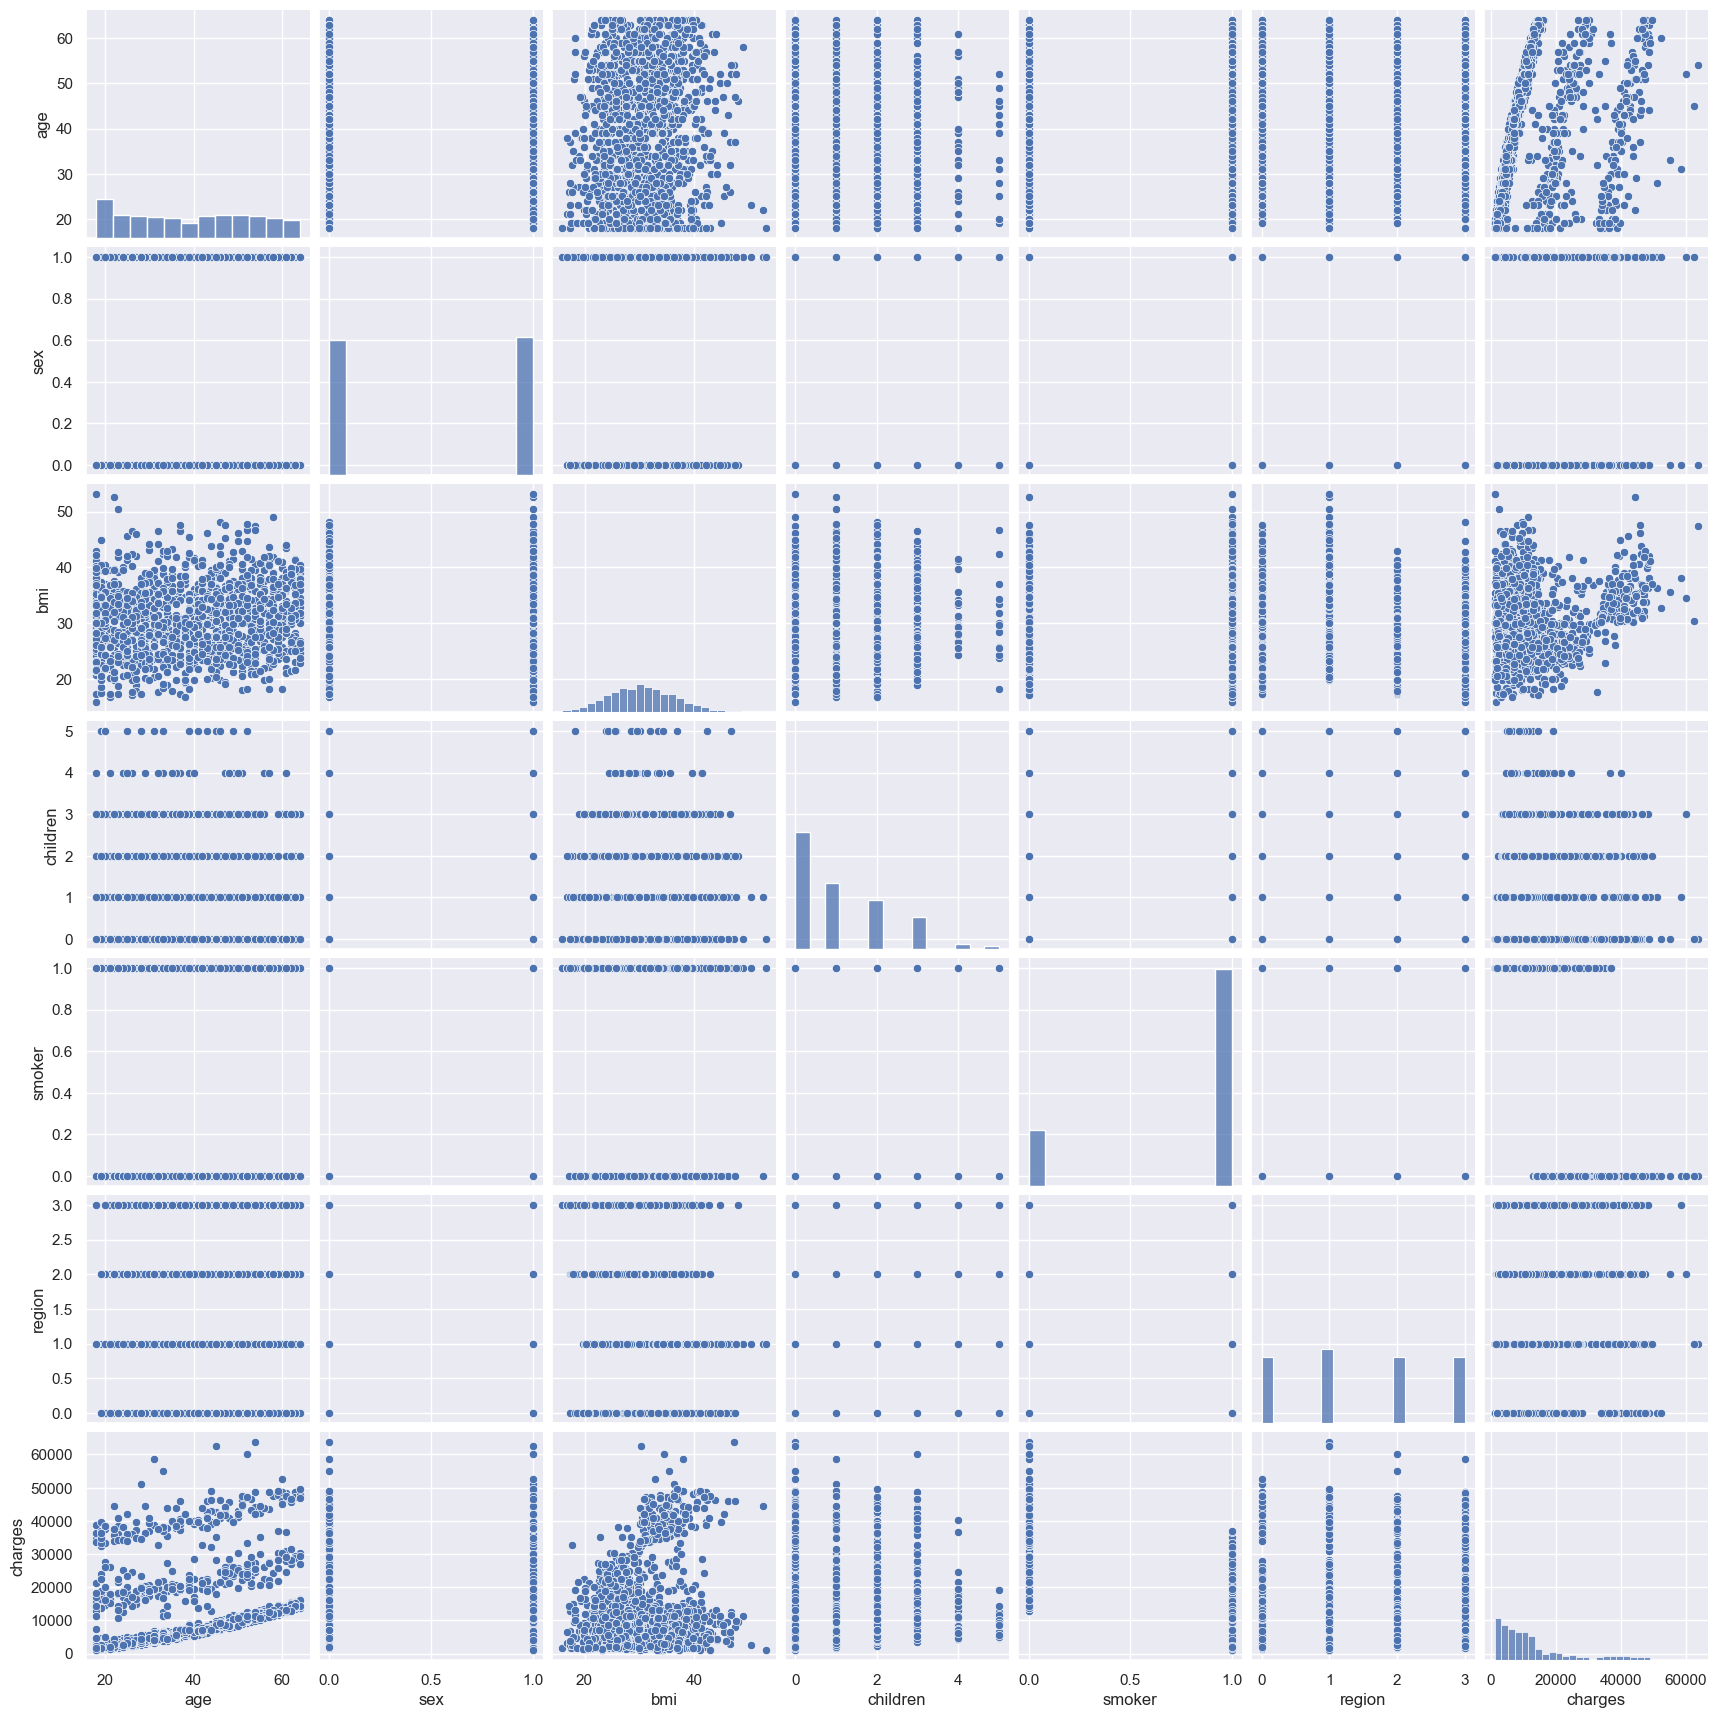

In [18]:
# pair-plot of all the data
sns.pairplot(data = fact_df)

<Axes: >

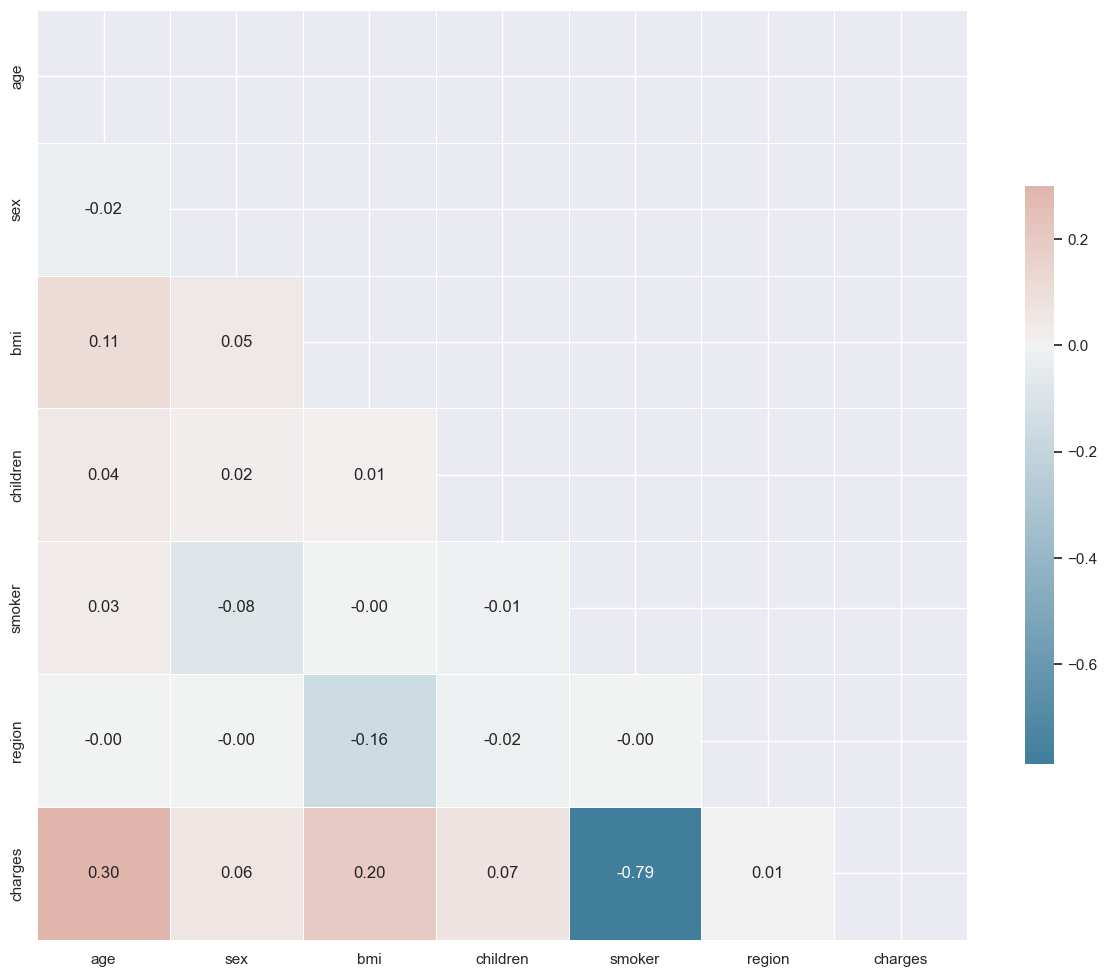

In [19]:
# compute the correlation matrix of all the data
corr = fact_df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
	corr, 
	annot=True,
	mask=mask, 
	cmap=cmap, 
	fmt=".2f",
	vmax=.3, 
	center=0,
	square=True, 
	linewidths=.5,
	cbar_kws={"shrink": .5},
)

### Conclusion

We can see that the variables that have the stronger correlation with the target **charges** are:

Positive correlation:
1. age
2. bmi

Negative correlation:
1. smoker

# Step 5: Feature engineering

Feature engineering is a process that involves the creation of new features (or variables) from existing ones to improve model performance. This may involve a variety of techniques, such as normalization, data transformation, and so on. The goal is to improve the accuracy of the model and/or reduce the complexity of the model, thus making it easier to interpret.

Although this could have been done in this step as it is part of the feature engineering, it is usually done before analyzing the variables, separating this process into a previous one and the one we are going to see next.

## Outlier analysis

An outlier is a data point that deviates significantly from the others. It is a value that is noticeably different from what would be expected given the general trend of the data. These outliers may be caused by errors in data collection, natural variations in the data, or they may be indicative of something significant, such as an anomaly or extraordinary event.

Descriptive analysis is a powerful tool for characterizing the data set: the mean, variance and quartiles provide powerful information about each variable. The describe() function of a DataFrame helps us to calculate in a very short time all these values.

In [20]:
# verify the distribution again, we are not going to work in the outliers this time
fact_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


**We are not going to treat the outliers**

## Missing value analysis

A **missing** value is a space that has no value assigned to it in the observation of a specific variable. These types of values are quite common and can arise for many reasons. For example, there could be an error in data collection, someone may have refused to answer a question in a survey, or it could simply be that certain information is not available or not applicable.

In [21]:
# verify non values
fact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


**Now null values so no more work should be done**

## Inference of new features

Another typical use of this engineering is to obtain new features by "merging" two or more existing ones.

**We are not creating new features in this exercise**

## Divide the set into train and test,

In [22]:
from utils import split_my_data


# set independent and dependent variables
X: pd.DataFrame = fact_df.drop(target, axis = 1)
y: pd.Series = fact_df[target]

# divide the dataset into training and test samples
X_train, X_test, y_train, y_test = split_my_data(X, y, test_size = 0.2, random_state = 42)

## Feature scaling

**Feature scaling** is a crucial step in data preprocessing for many Machine Learning algorithms. It is a technique that changes the range of data values so that they can be compared to each other.

### Feature Scaling with Scikit-learn (sklearn)

Scikit-learn (sklearn) provides several tools for feature scaling, each with its own characteristics and use cases. Here's a breakdown:

**1. StandardScaler:**

* **How it works:** Standardizes features by removing the mean and scaling to unit variance.
* **Formula:** `z = (x - u) / s`, where `u` is the mean and `s` is the standard deviation.
* **When to use:**
    * When your data has a Gaussian (normal) distribution, or you want to transform it to resemble a Gaussian distribution.
    * When your model assumes that features are centered around zero and have unit variance (e.g., linear regression, logistic regression, support vector machines).
* **Caution:** Sensitive to outliers.

**2. MinMaxScaler:**

* **How it works:** Scales features to a given range, usually between 0 and 1.
* **Formula:** `x_scaled = (x - x_min) / (x_max - x_min)`
* **When to use:**
    * When you need to keep the values within a specific range.
    * When you don't have many outliers.
    * When using algorithms that are sensitive to the magnitude of features (e.g., neural networks).
* **Caution:** Sensitive to outliers.

**3. RobustScaler:**

* **How it works:** Scales features using statistics that are robust to outliers (median and interquartile range).
* **Formula:** `x_scaled = (x - median) / IQR`, where `IQR` is the interquartile range.
* **When to use:**
    * When your data contains outliers.
    * When you want to reduce the impact of outliers on your scaling.
* **Caution:** Doesn't normalize data to a specific range.

**4. MaxAbsScaler:**

* **How it works:** Scales features by dividing each value by the maximum absolute value.
* **Formula:** `x_scaled = x / abs(x_max)`
* **When to use:**
    * When you have sparse data (data with many zero values).
    * When you want to preserve the sparsity of your data.
    * When you want to scale data to the range [-1, 1].
* **Caution:** Sensitive to outliers in the maximum absolute values.

**5. QuantileTransformer:**

* **How it works:** Transforms features to follow a uniform or normal distribution. It is a non-linear transformation.
* **When to use:**
    * When your data has a non-linear distribution.
    * When you want to reduce the impact of outliers.
    * Can also compress outliers into a smaller interval.
* **Caution:** Distorts correlations and distances.

**6. PowerTransformer:**

* **How it works:** Applies power transformations (Yeo-Johnson or Box-Cox) to make data more Gaussian-like.
* **When to use:**
    * When your data is skewed, and you want to normalize its distribution.
    * When your model assumes a Gaussian distribution.
* **Caution:** Works better for positive data. Box-Cox can only be used with strictly positive data.

**Key Considerations:**

* **Model Requirements:** The choice of scaler often depends on the requirements of your machine learning model. Some models are more sensitive to the scale of features than others.
* **Data Distribution:** Consider the distribution of your data (e.g., Gaussian, skewed, presence of outliers) when choosing a scaler.
* **Outliers:** If your data contains outliers, `RobustScaler` or `QuantileTransformer` are good choices.
* **Range Requirements:** If you need to scale data to a specific range (e.g., [0, 1] or [-1, 1]), use `MinMaxScaler` or `MaxAbsScaler`.
* **Pipelines and ColumnTransformer:** It is highly recommended to use the scikit-learn pipeline, and the ColumnTransformer to properly work with data that have different kind of data into it.

In this case we are going to use a **StandardScaler** because we do not have many outliers in the features, the outliers are in the target.

In [23]:
# numerical columns without the target
numerical_features = ['age', 'bmi', 'children']

In [24]:
from sklearn.preprocessing import StandardScaler 

# scaler instance
scaler = StandardScaler ()

### scaling training data --------------------------

# crate a copy of the train dataframe
X_train_scaled: pd.DataFrame = X_train.copy()
# scale just the numerical columns
X_train_scaled[numerical_features] = scaler.fit_transform(X_train_scaled[numerical_features])

### scaling testing data --------------------------

# crate a copy of the test dataframe
X_test_scaled: pd.DataFrame = X_test.copy()
# scale just the numerical columns
X_test_scaled[numerical_features] = scaler.fit_transform(X_test_scaled[numerical_features])

In [25]:
# print the head of the x train data
X_train_scaled.head()

,age,sex,bmi,children,smoker,region
560,0.472227,0,-1.756525,0.734336,1,2
1285,0.543313,0,-1.033082,-0.911192,1,3
1142,0.898745,0,-0.943687,-0.911192,1,1
969,-0.025379,0,0.622393,3.202629,1,1
486,1.040918,0,-1.504893,1.557100,1,2


In [26]:
# print the head of the x test data
X_test_scaled.head()

,age,sex,bmi,children,smoker,region
764,0.458596,0,-0.937152,0.822509,1,3
887,-0.187133,0,-0.167527,-0.899620,1,2
890,1.821801,0,-0.665519,-0.899620,0,2
1293,0.530343,1,-0.846608,1.683574,1,2
259,-1.406842,1,0.134287,-0.899620,0,2


# Step 6: Feature selection

The feature selection is a process that involves selecting the most relevant features (variables) from our dataset to use in building a Machine Learning model, discarding the rest.

There are several reasons to include it in our exploratory analysis:

1. To simplify the model so that it is easier to understand and interpret.
2. To reduce the training time of the model.
3. Avoid overfitting by reducing the dimensionality of the model and minimizing noise and unnecessary correlations.
4. Improve model performance by removing irrelevant features.
 
In addition, there are several techniques for feature selection. Many of them are based on trained supervised or clustering models. More information is available here.

The sklearn library contains many of the best alternatives to perform it. One of the most commonly used tools for fast and successful feature selection processes is SelectKBest. This function selects the k best features from our dataset based on a function of a statistical test. This statistical test is usually an ANOVA or a Chi-Square.

In [ ]:
from sklearn.feature_selection import SelectKBest

# create the selection model, we are not setting the K value because the results of the models are not great.
selection_model = SelectKBest()
# fit the model to the train scaled data
selection_model.fit(X_train_scaled, y_train)
# get the indexes of the selected columns
ix = selection_model.get_support()

# get the dataframe of the train selected columns
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train_scaled.columns.values[ix]) # type: ignore

# get the dataframe of the test selected columns
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test_scaled.columns.values[ix]) # type: ignore

f:\SoftwareInstalls\Anaconda\envs\ds_venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=6. All the features will be returned.
  warnings.warn(
f:\SoftwareInstalls\Anaconda\envs\ds_venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [28]:
# print the selected features on the training data
X_train_sel.head()

,age,sex,bmi,children,smoker,region
0,0.472227,0.0,-1.756525,0.734336,1.0,2.0
1,0.543313,0.0,-1.033082,-0.911192,1.0,3.0
2,0.898745,0.0,-0.943687,-0.911192,1.0,1.0
3,-0.025379,0.0,0.622393,3.202629,1.0,1.0
4,1.040918,0.0,-1.504893,1.557100,1.0,2.0


In [29]:
# print the selected features on the test data
X_test_sel.head()

,age,sex,bmi,children,smoker,region
0,0.458596,0.0,-0.937152,0.822509,1.0,3.0
1,-0.187133,0.0,-0.167527,-0.899620,1.0,2.0
2,1.821801,0.0,-0.665519,-0.899620,0.0,2.0
3,0.530343,1.0,-0.846608,1.683574,1.0,2.0
4,-1.406842,1.0,0.134287,-0.899620,0.0,2.0


## Conclusion

We can see that we got different features that the ones that have the best correlation.

# Step 7: Save the data

In [30]:
from utils import X_TRAIN_PATH, X_TEST_PATH, Y_TRAIN_PATH, Y_TEST_PATH 

# save the processed data to their corresponding files
X_train_sel.to_csv(path_or_buf = X_TRAIN_PATH, sep=',', index=False,)
X_test_sel.to_csv(path_or_buf = X_TEST_PATH, sep=',', index=False,)

y_train.to_csv(path_or_buf = Y_TRAIN_PATH, sep=',', index=False,)
y_test.to_csv(path_or_buf = Y_TEST_PATH, sep=',', index=False,)